In [1]:
import cdfjoin
import natjoin
import cdfsampler
import loadimdb
from datetime import datetime
from scipy.special import comb
from scipy import linspace
import timeit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_intermediate(tables, x, size = True):
    values = []
    for threshold in x:
        result = cdfjoin.cdfjoin(tables, threshold)
        if size:
            values.append([len(result[0][0]), len(result[1][0])])
        else:
            values.append([result[0][1], result[1][1]])
    return values

In [3]:
def outputsize_plot(tables):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.ylabel('Output Size')
    plt.xlabel('Sampling Probability')
    x = linspace(0, 1, 100)
    y = plot_intermediate(tables, x, True)
    y1 = [i for [i, j] in y]
    y2 = [j for [i, j] in y]
    plt.plot(x, y1, label = 'n = Hashed Sampling')
    plt.plot(x, y2, label = 'n = Random Sampling')
    plt.legend(loc='best')

In [4]:
def runtime_plot(tables, sampling_threshold):
    plt.style.use('seaborn')
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.ylabel('Runtime')
    plt.xlabel('Sampling Probability')
    x = linspace(0, 1, 100)
    y = plot_intermediate(tables, x, False)
    y1 = [i for [i, j] in y]
    y2 = [j for [i, j] in y]
    plt.plot(x, y1, label = 'n = Hashed Sampling')
    plt.plot(x, y2, label = 'n = Random Sampling')
    plt.legend(loc='best')

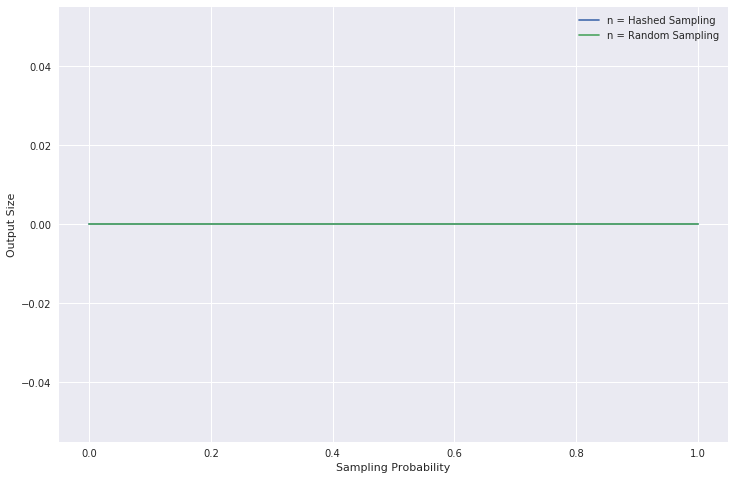

In [5]:
outputsize_plot(loadimdb.tables)

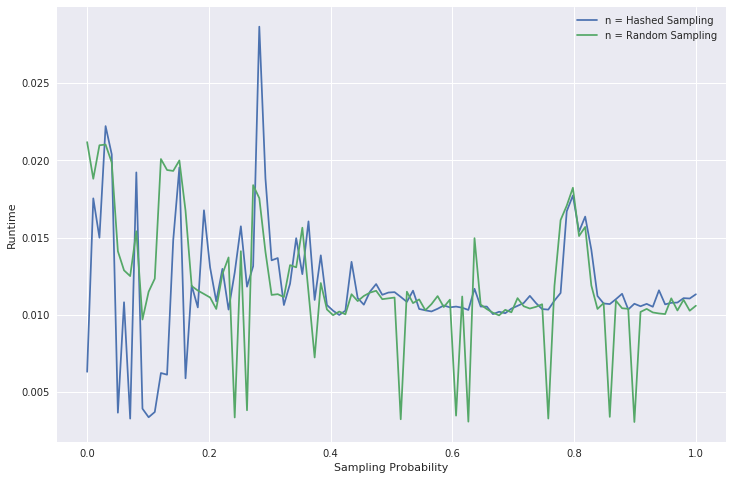

In [6]:
runtime_plot(loadimdb.tables, .5)